In [5]:
import pandas as pd
import numpy as np
import os
import datetime
from Manipulate import extract_datetime_8760
import matplotlib
import glob
import re
import matplotlib.pyplot as plt
%matplotlib notebook

In [6]:
summer = [6,7,8]
winter = [12,1,2]
def get_tot_data(df_ave,season = summer, hour_field = 'hour', energy_field = 'hvac'):
    data = df_ave.loc[df_ave['month'].isin(season)].groupby(hour_field, as_index=False).agg(
        {energy_field:'mean'})[energy_field]/df_ave.loc[df_ave['month'].isin(season)].groupby(
        hour_field, as_index=False).agg({energy_field:'mean'})[energy_field].sum()
    return data
def get_max_data(df_ave,season = summer, hour_field = 'hour', energy_field = 'hvac'):
    data = df_ave.loc[df_ave['month'].isin(season)].groupby(hour_field, as_index=False).agg(
        {energy_field:'mean'})[energy_field]/df_ave.loc[df_ave['month'].isin(season)].groupby(
        hour_field, as_index=False).agg({energy_field:'mean'})[energy_field].max()
    return data

In [7]:
data_direi = r'G:\Shared Drives\BTO Topic 2  Integrating EE & DR\Task 2\Load_Shape_Data\OPEN_EI\*'
files = glob.glob(data_direi)
city_sims = pd.DataFrame({'city':[], 'sim':[]})
for file in files:
    if 'USA_CA' in file:
        result = re.search('USA_CA_(.*)\.',file)
        city = result.group(1)
        file_m = os.listdir(file)[0]
        result_m = re.search('USA_(.*)\.csv', file_m)
        model = result_m.group(1)
        dfnew = pd.DataFrame({'city':[city],'sim':[model]})
        city_sims = city_sims.append(dfnew)
city_sims.sort_values(by=['city'], inplace=True)
city_sims.reset_index(drop=True, inplace=True)

In [13]:
city_sims.sim.unique()

array(['CO_BOULDER', 'NM_ALBUQUERQUE', 'CA_LOS_ANGELES',
       'CA_SAN_FRANCISCO', 'AZ_PHOENIX'], dtype=object)

<IPython.core.display.Javascript object>


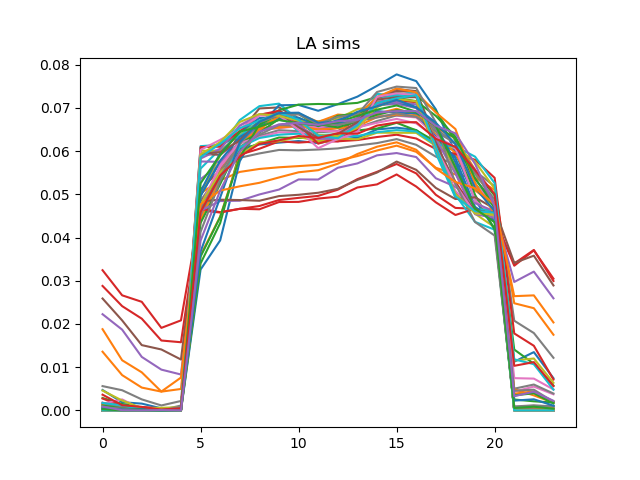

In [8]:
plt.figure()
data_direi = r'G:\Shared Drives\BTO Topic 2  Integrating EE & DR\Task 2\Load_Shape_Data\OPEN_EI\*'
plt.title('LA sims')
la_sims = city_sims.loc[city_sims['sim']=='CA_LOS_ANGELES'].reset_index()
for i in range(0,len(la_sims)):
    files = glob.glob(data_direi)
    city = la_sims.city[i]
    building_type = 'LargeOffice'
    dir = [dir for dir in files if city in dir]
    files = glob.glob(str(dir[0] + '\*'))
    file = [file for file in files if building_type in file]
    dfei = pd.read_csv(file[0])
    hourfield = 'hour'
    year = 2004
    dfei = dfei.reset_index().rename({'index':'hour'}, axis=1)
    dfei['hour'] = dfei['hour']+1
    dfei['hour'] = dfei['hour'].astype(float)
    dfei['day_of_year'] = np.ceil(dfei[hourfield]/24).astype(int)
    dt = datetime.datetime(year,1,1,0,0)
    dfei['date'] = dt
    for ind in dfei.index:
        hours=dfei.loc[ind, hourfield]-1
        dtdelta = datetime.timedelta(hours = hours)
        dfei.loc[ind,'date'] = dt+dtdelta
    dfei['month'] = dfei['date'].dt.month        
    dfei.drop('Date/Time', axis=1, inplace=True)
    dfei['weekend'] = dfei['date'].dt.weekday>4
    dfei['hvac'] = dfei['Cooling:Electricity [kW](Hourly)'] + dfei['Heating:Electricity [kW](Hourly)'] + dfei['Fans:Electricity [kW](Hourly)']
    dfei_clean=dfei
    dfei_clean['hour'] = dfei_clean['date'].dt.hour
    dfei_ave = dfei_clean.loc[~dfei_clean['weekend']].groupby([ 'month','hour']).agg({'hvac':'mean' }).reset_index()
    dfei_tot_s = get_tot_data(dfei_ave, season = summer, hour_field = 'hour', energy_field = 'hvac')
    dfei_tot_s.plot(label=city)


<IPython.core.display.Javascript object>


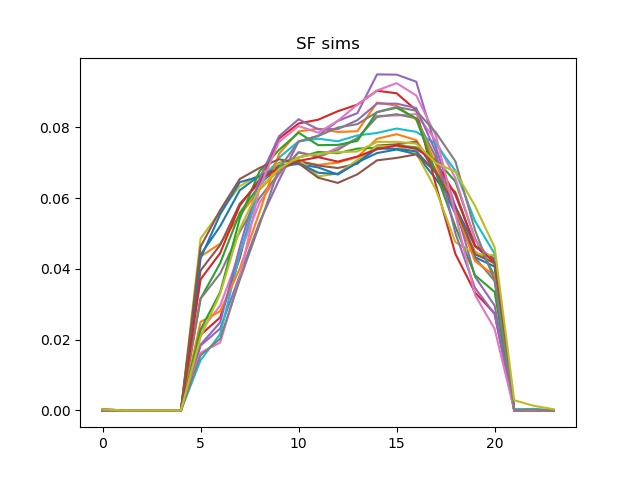

In [9]:
plt.figure()
data_direi = r'G:\Shared Drives\BTO Topic 2  Integrating EE & DR\Task 2\Load_Shape_Data\OPEN_EI\*'
plt.title('SF sims')
sf_sims = city_sims.loc[city_sims['sim']=='CA_SAN_FRANCISCO'].reset_index()
for i in range(0,len(sf_sims)):
    files = glob.glob(data_direi)
    city = sf_sims.city[i]
    building_type = 'LargeOffice'
    dir = [dir for dir in files if city in dir]
    files = glob.glob(str(dir[0] + '\*'))
    file = [file for file in files if building_type in file]
    dfei = pd.read_csv(file[0])
    hourfield = 'hour'
    year = 2004
    dfei = dfei.reset_index().rename({'index':'hour'}, axis=1)
    dfei['hour'] = dfei['hour']+1
    dfei['hour'] = dfei['hour'].astype(float)
    dfei['day_of_year'] = np.ceil(dfei[hourfield]/24).astype(int)
    dt = datetime.datetime(year,1,1,0,0)
    dfei['date'] = dt
    for ind in dfei.index:
        hours=dfei.loc[ind, hourfield]-1
        dtdelta = datetime.timedelta(hours = hours)
        dfei.loc[ind,'date'] = dt+dtdelta
    dfei['month'] = dfei['date'].dt.month        
    dfei.drop('Date/Time', axis=1, inplace=True)
    dfei['weekend'] = dfei['date'].dt.weekday>4
    dfei['hvac'] = dfei['Cooling:Electricity [kW](Hourly)'] + dfei['Heating:Electricity [kW](Hourly)'] + dfei['Fans:Electricity [kW](Hourly)']
    dfei_clean=dfei
    dfei_clean['hour'] = dfei_clean['date'].dt.hour
    dfei_ave = dfei_clean.loc[~dfei_clean['weekend']].groupby([ 'month','hour']).agg({'hvac':'mean' }).reset_index()
    dfei_tot_s = get_tot_data(dfei_ave, season = summer, hour_field = 'hour', energy_field = 'hvac')
    dfei_tot_s.plot(label=city)

<IPython.core.display.Javascript object>


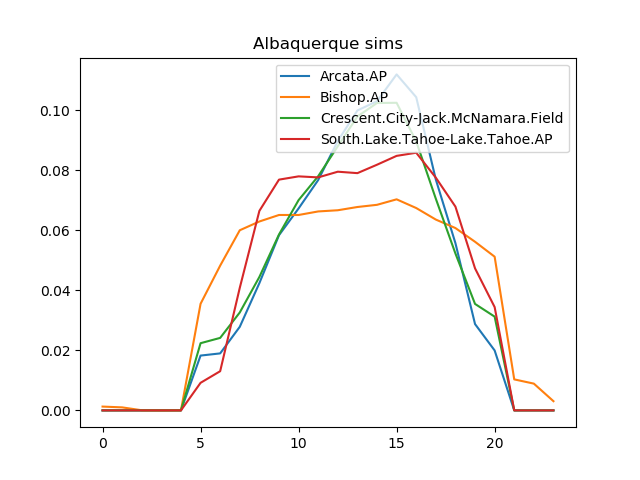

In [10]:
plt.figure()
data_direi = r'G:\Shared Drives\BTO Topic 2  Integrating EE & DR\Task 2\Load_Shape_Data\OPEN_EI\*'
plt.title('Albaquerque sims')
alb_sims = city_sims.loc[city_sims['sim']=='NM_ALBUQUERQUE'].reset_index()
for i in range(0,len(alb_sims)):
    files = glob.glob(data_direi)
    city = alb_sims.city[i]
    building_type = 'LargeOffice'
    dir = [dir for dir in files if city in dir]
    files = glob.glob(str(dir[0] + '\*'))
    file = [file for file in files if building_type in file]
    dfei = pd.read_csv(file[0])
    hourfield = 'hour'
    year = 2004
    dfei = dfei.reset_index().rename({'index':'hour'}, axis=1)
    dfei['hour'] = dfei['hour']+1
    dfei['hour'] = dfei['hour'].astype(float)
    dfei['day_of_year'] = np.ceil(dfei[hourfield]/24).astype(int)
    dt = datetime.datetime(year,1,1,0,0)
    dfei['date'] = dt
    for ind in dfei.index:
        hours=dfei.loc[ind, hourfield]-1
        dtdelta = datetime.timedelta(hours = hours)
        dfei.loc[ind,'date'] = dt+dtdelta
    dfei['month'] = dfei['date'].dt.month        
    dfei.drop('Date/Time', axis=1, inplace=True)
    dfei['weekend'] = dfei['date'].dt.weekday>4
    dfei['hvac'] = dfei['Cooling:Electricity [kW](Hourly)'] + dfei['Heating:Electricity [kW](Hourly)'] + dfei['Fans:Electricity [kW](Hourly)']
    dfei_clean=dfei
    dfei_clean['hour'] = dfei_clean['date'].dt.hour
    dfei_ave = dfei_clean.loc[~dfei_clean['weekend']].groupby([ 'month','hour']).agg({'hvac':'mean' }).reset_index()
    dfei_tot_s = get_tot_data(dfei_ave, season = summer, hour_field = 'hour', energy_field = 'hvac')
    dfei_tot_s.plot(label=city)
plt.legend(loc='upper right')

<IPython.core.display.Javascript object>


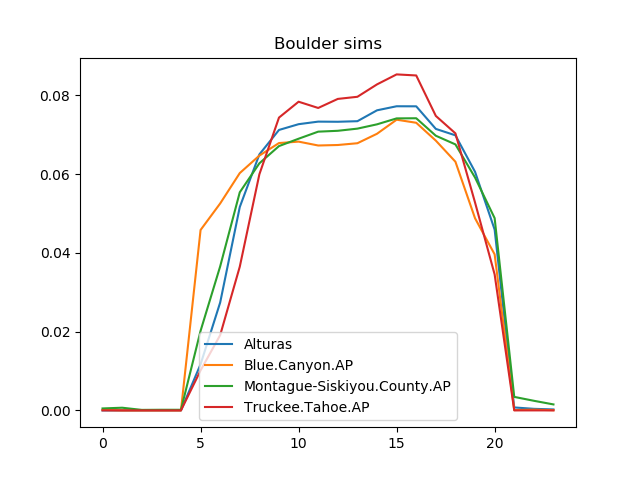

C:\Users\jglasskatz\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\legend.py:497: UserWarning: Unrecognized location "upper_right". Falling back on "best"; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center

  % (loc, '\n\t'.join(self.codes)))


In [11]:
plt.figure()
data_direi = r'G:\Shared Drives\BTO Topic 2  Integrating EE & DR\Task 2\Load_Shape_Data\OPEN_EI\*'
plt.title('Boulder sims')
boulder_sims = city_sims.loc[city_sims['sim']=='CO_BOULDER'].reset_index()
for i in range(0,len(boulder_sims)):
    files = glob.glob(data_direi)
    city = boulder_sims.city[i]
    building_type = 'LargeOffice'
    dir = [dir for dir in files if city in dir]
    files = glob.glob(str(dir[0] + '\*'))
    file = [file for file in files if building_type in file]
    dfei = pd.read_csv(file[0])
    hourfield = 'hour'
    year = 2004
    dfei = dfei.reset_index().rename({'index':'hour'}, axis=1)
    dfei['hour'] = dfei['hour']+1
    dfei['hour'] = dfei['hour'].astype(float)
    dfei['day_of_year'] = np.ceil(dfei[hourfield]/24).astype(int)
    dt = datetime.datetime(year,1,1,0,0)
    dfei['date'] = dt
    for ind in dfei.index:
        hours=dfei.loc[ind, hourfield]-1
        dtdelta = datetime.timedelta(hours = hours)
        dfei.loc[ind,'date'] = dt+dtdelta
    dfei['month'] = dfei['date'].dt.month        
    dfei.drop('Date/Time', axis=1, inplace=True)
    dfei['weekend'] = dfei['date'].dt.weekday>4
    dfei['hvac'] = dfei['Cooling:Electricity [kW](Hourly)'] + dfei['Heating:Electricity [kW](Hourly)'] + dfei['Fans:Electricity [kW](Hourly)']
    dfei_clean=dfei
    dfei_clean['hour'] = dfei_clean['date'].dt.hour
    dfei_ave = dfei_clean.loc[~dfei_clean['weekend']].groupby([ 'month','hour']).agg({'hvac':'mean' }).reset_index()
    dfei_tot_s = get_tot_data(dfei_ave, season = summer, hour_field = 'hour', energy_field = 'hvac')
    dfei_tot_s.plot(label=city)
plt.legend(loc='best')